In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import io
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Assignment2Dataset.xlsx to Assignment2Dataset (1).xlsx


In [ ]:
data = pd.read_excel(io.BytesIO(uploaded['Assignment2Dataset.xlsx']))
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [ ]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


(array([ 2.,  9., 17., 30., 29., 30., 34., 30., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <a list of 10 Patch objects>)

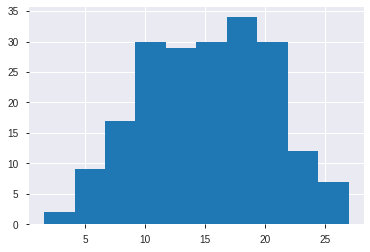

In [ ]:
plt.hist(data['Sales'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f2b83125290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2b830bc090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2b830c50d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2b830bcb50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2b830b65d0>,
  <matplotlib.lines.Line2D at 0x7f2b830b6b10>]}

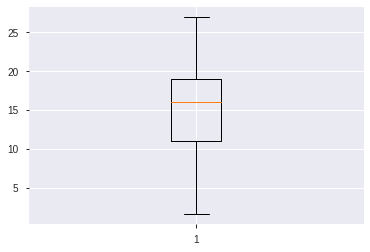

In [ ]:
plt.boxplot(data['Sales'])

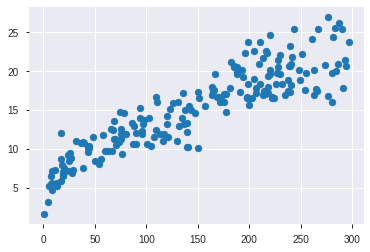

In [ ]:
plt.scatter(x=data['TV'],y=data['Sales'])

In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(data['TV'], data['Sales'])
print(corr)

0.9012079133023307


In [ ]:
y=data.Sales
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [ ]:
#x=data.drop('Sales',axis=1)
x=data.TV
print(x)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64


In [ ]:
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [ ]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)

In [ ]:
print(data.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 4)
(140, 1)
(140, 1)
(60, 1)
(60,)


In [ ]:
x_train=x_train.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#x_test=x_test.values.reshape(-1,1)
ypred =model.predict(x_test)
ypred

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ypred)

4.077556371826948

In [ ]:
print("Test R squared", 1 - mean_squared_error(y_test,ypred) / mean_squared_error(y_test, [y_test.mean()]*y_test.shape[0]))

Test R squared 0.7921031601245663


Radio

In [ ]:
y=data.Sales
print(y)

In [ ]:
x1=data.Radio
print(x1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=100,test_size=0.3)

In [ ]:
print(data.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 4)
(140,)
(140,)
(60,)
(60,)


In [ ]:
x_train=x_train.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#x_test=x_test.values.reshape(-1,1)
ypred =model.predict(x_test)
ypred

array([16.98515715, 16.41512576, 17.33213278, 16.31598986, 16.87362927,
       12.80905759, 13.93672839, 12.59839382, 17.33213278, 17.60475649,
       13.98629634, 16.16728602, 12.87101753, 14.7793835 , 13.62692872,
       12.77188163, 16.57622159, 13.13124925, 16.72492543, 14.32087999,
       15.13875112, 12.87101753, 18.07565199, 16.30359788, 14.76699151,
       18.23674782, 16.31598986, 14.6802476 , 17.60475649, 16.45230172,
       17.67910841, 13.31712905, 13.20560117, 14.40762389, 13.60214475,
       15.69639052, 12.35055408, 13.04450534, 12.58600183, 14.44479985,
       15.08918317, 14.07304025, 14.75459952, 12.83384157, 14.5935037 ,
       13.39148097, 17.57997252, 15.52290271, 14.14739217, 12.62317779,
       14.92808734, 17.08429305, 16.50186967, 17.46844464, 15.82031039,
       17.0347251 , 12.67274574, 16.99754914, 15.05200721, 16.60100556])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ypred)

16.590289124066075

In [ ]:
print("Test R squared", 1 - mean_squared_error(y_test,ypred) / mean_squared_error(y_test, [y_test.mean()]*y_test.shape[0]))

Test R squared 0.15413341545839598


NewsNewspaper 

In [ ]:
y=data.Sales
print(y)

In [ ]:
x2=data.Newspaper
print(x2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y,random_state=100,test_size=0.3)

In [ ]:
print(data.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_train=x_train.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_test=x_test.values.reshape(-1,1)
ypred =model.predict(x_test)
ypred

array([16.14714827, 13.44845519, 15.86715142, 16.64756818, 14.51482618,
       14.28844575, 14.6578033 , 13.48419947, 15.49183648, 14.75312138,
       13.45441257, 17.55308992, 14.90205588, 13.69866514, 14.67567544,
       13.61526182, 13.49015685, 15.22971177, 13.57356016, 15.43226268,
       13.37100925, 14.99737395, 16.28416801, 15.43822006, 14.44333763,
       13.32335021, 15.81949238, 15.06886251, 13.23398951, 13.87142916,
       15.25354129, 13.18633047, 16.03395805, 14.6578033 , 14.22887195,
       13.978662  , 14.91992802, 13.89525868, 13.91313082, 17.04671263,
       16.56416486, 13.27569117, 15.95651211, 14.76503614, 13.82377012,
       15.25949867, 18.45861166, 14.49695404, 15.56332504, 13.95483248,
       15.01524609, 15.37864627, 16.27225325, 14.85439684, 13.68675038,
       15.81949238, 15.01524609, 13.68675038, 13.978662  , 16.06970233])

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ypred)

22.44893915968264

In [ ]:
print("Test R squared", 1 - mean_squared_error(y_test,ypred) / mean_squared_error(y_test, [y_test.mean()]*y_test.shape[0]))

Test R squared -0.14457363289935832


multiple regression

In [ ]:
print(data)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [ ]:
Y = data.Sales
print(Y)

In [ ]:
X = data.drop('Sales',axis=1)
print(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=100,test_size=0.3)

In [ ]:
print(data.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 4)
(140, 3)
(140,)
(60, 3)
(60,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ypred =model.predict(x_test)
ypred

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,ypred)

2.6360765623280655

In [ ]:
print("Test R squared", 1 - mean_squared_error(y_test,ypred) / mean_squared_error(y_test, [y_test.mean()]*y_test.shape[0]))

Test R squared 0.8655979373420272
